# import

In [35]:
import openpyxl
import math
import matplotlib.pyplot as plt

# Загрузка данных из .xlsx

In [14]:
default_path = '3302_Kalugina_Sarzhevskiy.xlsx'

path = input('Введите путь к .xlsx таблице (оставьте пустым для загрузки из таблицы по умолчанию): ')

wb = openpyxl.load_workbook(default_path) if path == '' else openpyxl.load_workbook(path)
sh = wb.active

input_data = []

for i in range(1, 301):
    input_data.append(float(sh.cell(row=i, column=1).value))

if path == '':
    print(f"Загружена трасса из {len(input_data)} чисел из файла {default_path}")
else:
    print(f"Загружена трасса из {len(input_data)} чисел из файла {path}")

Введите путь к .xlsx таблице (оставьте пустым для загрузки из таблицы по умолчанию): 
Загружена трасса из 300 из файла 3302_Kalugina_Sarzhevskiy.xlsx


# Оценки основных характеристик посдедовательности

In [30]:
student_test_coef = {
    0.90: 1.643,
    0.95: 1.960,
    0.99: 2.580
}

def compute_characteristics_for_n_values(n):
    expected_value = sum(input_data[:n]) / n
    print(f"Оценка математического ожидания для {n} элементов: {expected_value}")

    dispersion = sum([(x - expected_value)**2 for x in input_data[:n]]) / (n - 1)
    print(f"Оценка диперсии для {n} элементов: {dispersion}")

    standard_deviation = math.sqrt(dispersion / len(input_data))
    print(f"Оценка среднеквадратического отклонения для {n} элементов: {standard_deviation}")
    
    variation = standard_deviation / expected_value
    print(f"Оценка коэффициента вариации для {n} элементов: {variation}")
    
    epsilon_90 = student_test_coef[0.90] * standard_deviation
    print(f"Эпсилон 0.90 ({n} элементов): {epsilon_90}")
    
    epsilon_95 = student_test_coef[0.95] * standard_deviation
    print(f"Эпсилон 0.95 ({n} элементов): {epsilon_95}")
    
    epsilon_99 = student_test_coef[0.99] * standard_deviation
    print(f"Эпсилон 0.99 ({n} элементов): {epsilon_99}")
    
    return [expected_value, dispersion, standard_deviation, variation, epsilon_90, epsilon_95, epsilon_99]
    
c_10 = compute_characteristics_for_n_values(10)
print()
c_50 = compute_characteristics_for_n_values(50)
print()
c_100 = compute_characteristics_for_n_values(100)
print()
c_200 = compute_characteristics_for_n_values(200)
print()
c_300 = compute_characteristics_for_n_values(300)

# TODO: print table

Оценка математического ожидания для 10 элементов: 1.920856418997817
Оценка диперсии для 10 элементов: 15.251124970522158
Оценка среднеквадратического отклонения для 10 элементов: 0.22547080350917692
Оценка коэффициента вариации для 10 элементов: 0.11738035247153637
Эпсилон 0.90 (10 элементов): 0.37044853016557766
Эпсилон 0.95 (10 элементов): 0.44192277487798676
Эпсилон 0.99 (10 элементов): 0.5817146730536765

Оценка математического ожидания для 50 элементов: 2.199855565563386
Оценка диперсии для 50 элементов: 15.765920806944548
Оценка среднеквадратического отклонения для 50 элементов: 0.2292445623269652
Оценка коэффициента вариации для 50 элементов: 0.10420891531042646
Эпсилон 0.90 (50 элементов): 0.3766488159032038
Эпсилон 0.95 (50 элементов): 0.4493193421608518
Эпсилон 0.99 (50 элементов): 0.5914509708035702

Оценка математического ожидания для 100 элементов: 1.9333170603657206
Оценка диперсии для 100 элементов: 14.603477111238902
Оценка среднеквадратического отклонения для 100 элеме

# График заданной последовательности

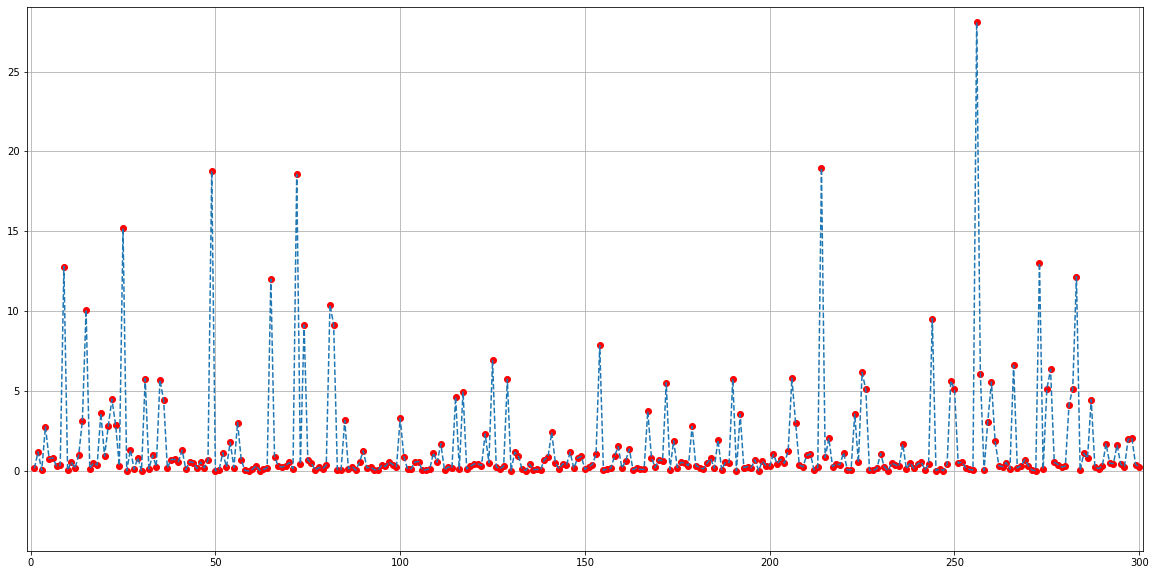

In [39]:
x_border = (-1, 301)
y_border = (min(input_data) - 5, max(input_data) + max(input_data) / 30)

plt.figure(figsize=(20, 10))
plt.plot(range(1, 301), input_data, 'ro', range(1, 301), input_data, '--')

ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([x_border[0], x_border[1], y_border[0], y_border[1]])

plt.grid()
plt.show()

# Расчет коэффициента автокорреляции

In [34]:
def compute_autocorrelation(n):
    x_data = input_data[:(len(input_data) - n)]
    y_data = input_data[n:]
    
    m_1 = sum(x_data) / len(x_data)
    m_2 = sum(y_data) / len(y_data)
    
    autocorr_coef = sum([(x - m_1) * (y - m_2) for (x, y) in zip(x_data, y_data)]) / math.sqrt(sum([(x - m_1)**2 for x in x_data]) * sum([(y - m_2)**2 for y in y_data]))
    print(f"Коэффициент автокорреляции ({n}): {autocorr_coef}")
    
    return autocorr_coef

autocorr_coefs = []
for i in range(1, 11):
    autocorr_coefs.append(compute_autocorrelation(i))

Коэффициент автокорреляции (1): -0.0033663339856774502
Коэффициент автокорреляции (2): -0.01484969928254023
Коэффициент автокорреляции (3): -0.056866134871722054
Коэффициент автокорреляции (4): -0.014721206933041618
Коэффициент автокорреляции (5): -0.056271032132896415
Коэффициент автокорреляции (6): 0.03246459146705559
Коэффициент автокорреляции (7): 0.09593473151398874
Коэффициент автокорреляции (8): 0.0023855025346994365
Коэффициент автокорреляции (9): 0.02723066377808868
Коэффициент автокорреляции (10): 0.13285968235271267


# График коэффициентов автокорреляции

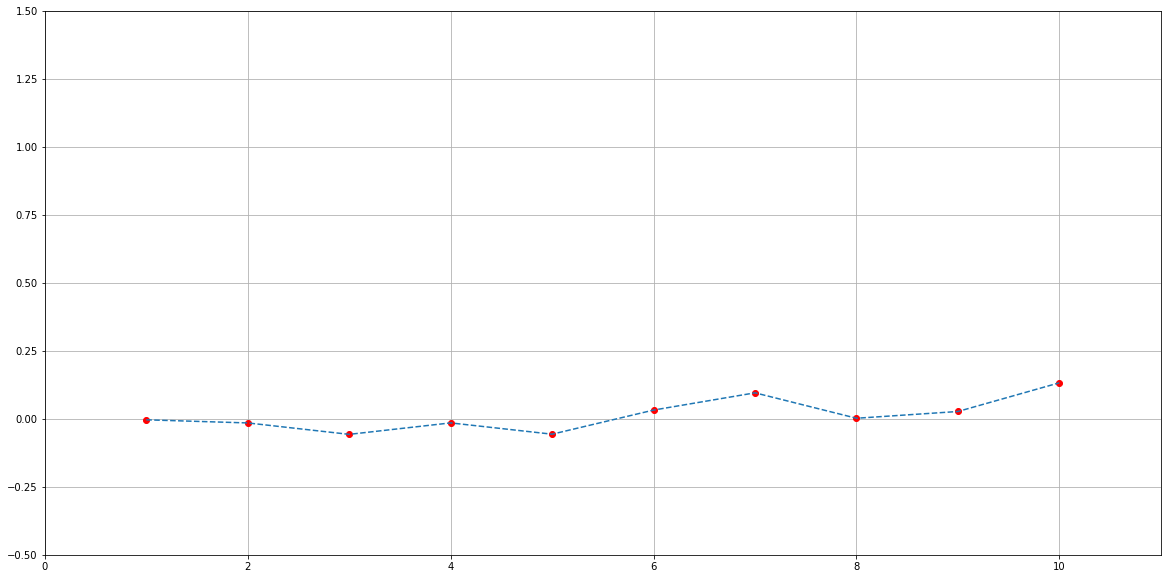

In [40]:
x_border = (0, 11)
y_border = (-0.5, 1.5)

plt.figure(figsize=(20, 10))
plt.plot(range(1, 11), autocorr_coefs, 'ro', range(1, 11), autocorr_coefs, '--')

ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([x_border[0], x_border[1], y_border[0], y_border[1]])

plt.grid()
plt.show()

# Гистограмма распределения частот

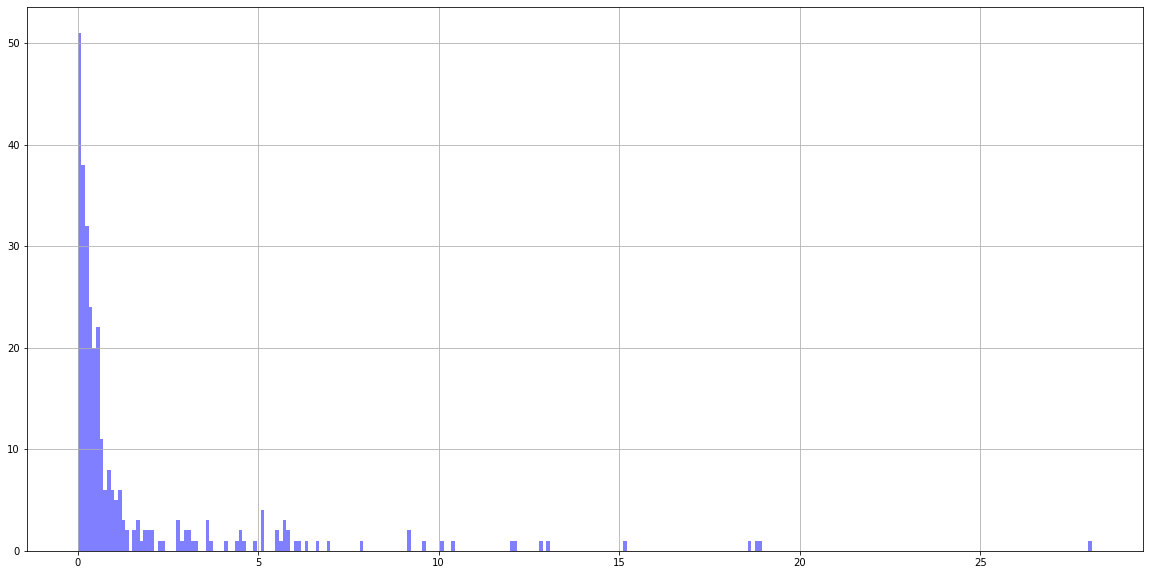

In [81]:
# TODO: find better way to compute num_intervals
interval_len = (3.5 * c_300[2])/(300**(1./3.)) # Scott's formula
num_intervals = int(max(input_data) / interval_len)

plt.figure(figsize=(20, 10))
n, bins, patches = plt.hist(input_data, num_intervals, facecolor='blue', alpha=0.5)

plt.grid()
plt.show()